Logan Becker
 - Collaborator 1
 - Collaborator 2
 - etc

DS325, Gettysburg College, Professor Eatai Roth
# Problem Set 2 - Classification

Due Friday Mar 28, 2025 4p

Total pts: 30

## IMPORTANT INSTRUCTIONS:

 - When you submit your code, make sure that every cell runs without returning an error.
 - Once you have the results you need, edit out any extraneous code and outputs.
 - *Do not rewrite code* if it doesn't need to be rewritten. For example, all the import statements you should need are in the first code block. Do not redo those in your analysis.

## Problem 1

In this problem, you'll be comparing Logistic Regression, Decision Trees, and Random Forests in a task identifying mushrooms as edible or poisonous.
The data is imported below and the features and feature values are listed. Notice, they're all letters.

 - Split the data into targets and features
 - Decide which features are ordinal or categorical. Refer to the feature descriptions on the [UCI Machine Learning site](https://archive.ics.uci.edu/dataset/73/mushroom) (hint: at least 3 categories are ordinal and others are binary...so you'll use an ordinal encoder)
 - Encode the features
 - Train the three models. You will want to use ```LogisticRegressionCV``` and ```GridSearchCV``` to find the best version of each model.
 - Make predictions with your models.
 - Show the confusion matrices for each type of model evaluated on the same test set. Label each figure clearly as to which model it is.

In [1]:
#Importing packages 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegressionCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [2]:
mushrooms_df = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/refs/heads/master/mushrooms.csv')

for k, col in enumerate(mushrooms_df.columns):
    print(f'{k:>3}. {col} - {mushrooms_df[col].unique()}')

  0. type - ['p' 'e']
  1. cap_shape - ['x' 'b' 's' 'f' 'k' 'c']
  2. cap_surface - ['s' 'y' 'f' 'g']
  3. cap_color - ['n' 'y' 'w' 'g' 'e' 'p' 'b' 'u' 'c' 'r']
  4. bruises - ['t' 'f']
  5. odor - ['p' 'a' 'l' 'n' 'f' 'c' 'y' 's' 'm']
  6. gill_attachment - ['f' 'a']
  7. gill_spacing - ['c' 'w']
  8. gill_size - ['n' 'b']
  9. gill_color - ['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o']
 10. stalk_shape - ['e' 't']
 11. stalk_root - ['e' 'c' 'b' 'r' '?']
 12. stalk_surface_above_ring - ['s' 'f' 'k' 'y']
 13. stalk_surface_below_ring - ['s' 'f' 'y' 'k']
 14. stalk_color_above_ring - ['w' 'g' 'p' 'n' 'b' 'e' 'o' 'c' 'y']
 15. stalk_color_below_ring - ['w' 'p' 'g' 'b' 'n' 'e' 'y' 'o' 'c']
 16. veil_type - ['p']
 17. veil_color - ['w' 'n' 'o' 'y']
 18. ring_number - ['o' 't' 'n']
 19. ring_type - ['p' 'e' 'l' 'f' 'n']
 20. spore_print_color - ['k' 'n' 'u' 'h' 'w' 'r' 'o' 'y' 'b']
 21. population - ['s' 'n' 'a' 'v' 'y' 'c']
 22. habitat - ['u' 'g' 'm' 'd' 'p' 'w' 'l']


In [3]:
'''your code here. add cells as needed'''
#Getting the data ready for the models 
#creating the features and targets 
X = mushrooms_df.drop(columns='type')
y = mushrooms_df['type']

#using ordinal encoder 
ordEnc = OrdinalEncoder()
X = ordEnc.fit_transform(X)

#scaling the data
ss = StandardScaler()
X = ss.fit_transform(X)

#splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

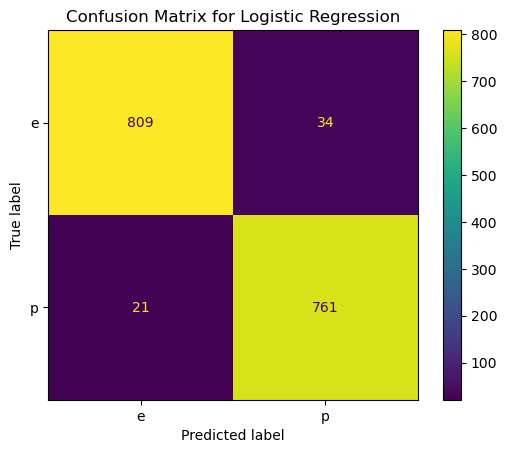

In [4]:
#Logistic Regression Model
#finding the best model (LogsticRegresionCV based on scikit learn)
Model_LogReg_CV = LogisticRegressionCV(Cs=10, fit_intercept=True, cv=None, penalty='l2', scoring='accuracy', solver='lbfgs', max_iter=800, refit=True)
Model_LogReg_CV.fit(X_train, y_train)

#mkaing predictions
y_pred = Model_LogReg_CV.predict(X_test)

#confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=Model_LogReg_CV.classes_)
disp.plot()
plt.title('Confusion Matrix for Logistic Regression')
plt.show()


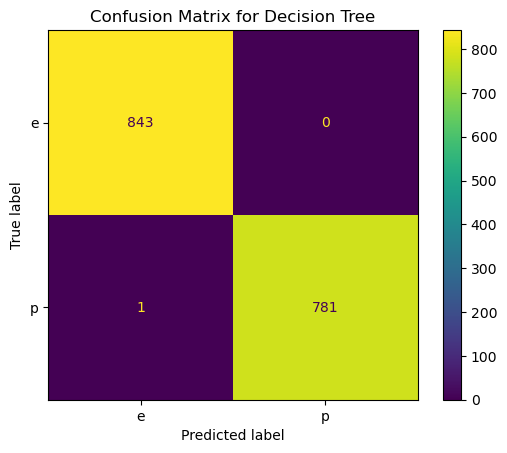

Accuracy: 1.00
Recall: 1.00
Precision: 1.00


In [5]:
#Decison Tree Model
#finding the best model (GridSearchCV)
tree_params = {'max_depth': [2, 4, 6],'min_samples_split': [5, 10, 20] }
tree_clf = DecisionTreeClassifier()
grid_search = GridSearchCV(tree_clf,param_grid = tree_params, cv = 5)
grid_search.fit(X_train, y_train)

#making predictions
y_pred = grid_search.predict(X_test)

#confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=grid_search.classes_)
disp.plot()
plt.title('Confusion Matrix for Decision Tree')
plt.show()

#finding accuracy, recall, and percison
accuracy = grid_search.score(X_test, y_test)
print(f'Accuracy: {accuracy:.2f}')
print(f'Recall: {cm[1,1]/(cm[1,0]+cm[1,1]):.2f}')
print(f'Precision: {cm[1,1]/(cm[0,1]+cm[1,1]):.2f}')


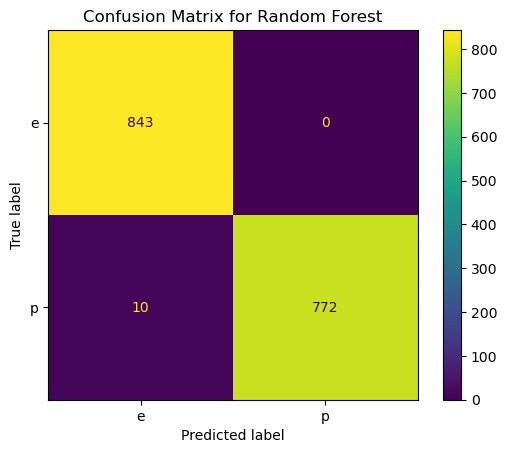

In [6]:
#Random Forest Model
#finding the best model (GridSearchCV)
forest_params = {'n_estimators': [100, 200, 300], 'max_depth': [2, 4, 6]}
forest_clf = RandomForestClassifier()
grid_search = GridSearchCV(forest_clf, param_grid = forest_params, cv = 5)
grid_search.fit(X_train, y_train)

#making predictions
y_pred = grid_search.predict(X_test)

#confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=grid_search.classes_)
disp.plot()
plt.title('Confusion Matrix for Random Forest')
plt.show()

### Problem 1 questions

 - Which model was best?
 - What were the hyper-parameters of this model.
 - What were the accuracy, recall, and precision of the model.
 - Of accuracy, recall, precision, which did you use to decide the best model.

#### Your responses here:

- Which model: The model that was the best was the decision tree.
- Hyper-parameters: max_depth (which are 2, 4, and 6) and min_samples_split (which are 5, 10, and 20)
- Metrics
    - Accuracy: 1
    - Recall: 1
    - Precision: 1
- How did you decide best? I decided that the decision tree was the best model because it only made a mistake on one case (labeled a mushroom edible that was poisonous). Because I considered this to be the worst mistake, and the decision tree made the fewest of these mistakes, this was the model I selected.

## Problem 2

The NFL draft is coming up at the end of April. This is when NFL teams get to select college players to join their team. The draft comprises seven rounds over three days (day 1: round 1, day 2: rounds 2 and 3, day 3: rounds 4, 5, 6, 7) with teams taking turns selecting players. Better players tend to go in earlier rounds.

In this problem, you will try to predict whether defensive players are drafted on Day 1, 2, or 3 based on their performance in the NFL combine (an assay of physical skills).

The data are imported below.

 - Create a target variable for day 1, day 2, day 3 based on the round drafted.
 - Create the most accurate predictor you can using any method or subset of the data you choose. *You may not use round as a feature!*
 - Show the confusion matrix for your model and list the accuracy of your model.

In [7]:
nfl_draft = pd.read_csv('https://raw.githubusercontent.com/eatai/datasets/refs/heads/main/nfl_defensive_draft.csv')

In [8]:
#exploring the data 
nfl_draft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2303 entries, 0 to 2302
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          2303 non-null   int64  
 1   round               2303 non-null   int64  
 2   season              2303 non-null   int64  
 3   name                2303 non-null   object 
 4   age                 2262 non-null   float64
 5   position            2303 non-null   object 
 6   college_conference  1471 non-null   object 
 7   height              2303 non-null   float64
 8   weight              2303 non-null   float64
 9   forty               2134 non-null   float64
 10  vertical            1832 non-null   float64
 11  broad_jump          1811 non-null   float64
 12  cone                1340 non-null   float64
 13  shuttle             1383 non-null   float64
dtypes: float64(8), int64(3), object(3)
memory usage: 252.0+ KB


In [9]:
#creating the target varible based on round 
def draft_round(round):
    if round == 1:
        return 'day 1'
    elif round == 2:
        return 'day 2'
    else:
        return 'day 3'
nfl_draft['draft_round'] = nfl_draft['round'].apply(draft_round)

In [10]:
#creating the features and target
X = nfl_draft.drop(columns=['round', 'draft_round', 'name'])
y = nfl_draft['draft_round']

#one hot encoding
cat_features = ['position', 'college_conference']
hotEnc = OneHotEncoder(sparse_output = False) 

#scaling the data
num_features = X.columns.difference(cat_features) 
ss = StandardScaler()

ct = ColumnTransformer([('hotEnc', hotEnc, cat_features), (('scaler', ss, num_features))], remainder='passthrough')

X_transformed = ct.fit_transform(X)
feature_names = ct.get_feature_names_out()

labelEnc = LabelEncoder()
y_transformed = labelEnc.fit_transform(y)

In [11]:
#splitting the data
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y_transformed, test_size=0.2, random_state=42)

#training the model (decsion tree)
tree_params = {'max_depth': [2, 4, 6],'min_samples_split': [5, 10, 20] }
tree_clf = DecisionTreeClassifier()
grid_search = GridSearchCV(tree_clf,param_grid = tree_params, cv = 5)
grid_search.fit(X_train, y_train)

#making predictions
y_pred = grid_search.predict(X_test)

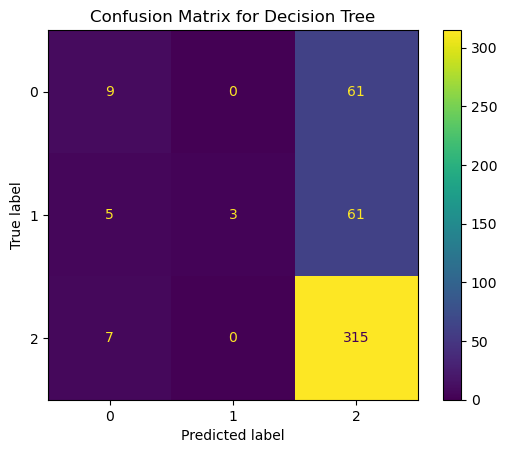

Accuracy: 0.71


In [12]:
#confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=grid_search.classes_)
disp.plot()
plt.title('Confusion Matrix for Decision Tree')
plt.show()

#getting accuracy 
accuracy = grid_search.score(X_test, y_test)
print(f'Accuracy: {accuracy:.2f}')

### Problem 2 Questions

 - Which kind of model did you use and why did you choose it? 
 I chose a decision tree because it performed the best in Problem 1. Additionally, I felt that many of the features in this dataset don't necessarily correlate well with each other, so I believed that a logistic regression model wouldn't work as effectively. Also, based on my current understanding, I find decision trees easier to interpret than random forests.
 - What was your accuracy? 
 The accuracy was 0.71 